# Part 1- Tracking Objects 

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches
import AuxFunctions

Function to draw an img and also his boundÇing box

@params:

- ***img*** -> img to show.
- ***bboxPred*** -> Predicted bounding box.
- ***bboxReal*** -> Real bounging box.

In [3]:
def drawBox(img,bboxPred, bboxReal):
    x1,y1,width,height = bboxPred
    predRect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='red', facecolor='none')
    
    x2,y2,widt2,heigh2 = bboxReal
    realRect = patches.Rectangle((x2, y2), widt2, heigh2, linewidth=1, edgecolor='green', facecolor='none')
    
    fig,ax = plt.subplots()
    ax.imshow(img)
    ax.add_patch(predRect)
    ax.add_patch(realRect)
    plt.show()

Function to generate the tracking

@params:

- ***mainDirectory*** -> Directory to where are located the frames to make the track. By default we use the *MotorcycleChase*
    - *MotorcycleChase*
    - *Bike*
    - *Parakeet*
- ***maxFramesShow*** -> Maximum images to make the traking. By default = *200*
- ***trackAlg*** -> Tracking algotithm used. list of possibilities: [KCF, CSRT, MIL]. By default *KCF*w
- ***showEveryX*** -> Show the image prediction each x iterations. By default 5.

In [4]:
def trackObject(mainDirectory = "./MotorcycleChase/", maxFramesShow = 1000, trackAlg ="",showEveryX=5):
    
    filepathBB = os.path.join("datasets",mainDirectory, "groundtruth_rect.txt")
    try:
        boundingBoxes = AuxFunctions.getBoundingBoxes(filepathBB)
    except:
        print("Haven't been found the groundtruth_rect.txt file")
        
    if trackAlg == "KCF":    
        tracker = cv2.TrackerKCF_create()
    elif trackAlg == "CSRT":
        tracker = cv2.TrackerCSRT_create()
    elif trackAlg == "MIL":
        tracker = cv2.TrackerMIL_create()
    else:
        print("Tracker not recognised, list of possibilities: [KCF, CSRT, MIL]. \n Usign KCF by default")
        tracker = cv2.TrackerKCF_create()

    i = 1
    
    correct = []
    succes = True
    
    directory = os.path.join("datasets", mainDirectory, "img")
    framesShow = min(maxFramesShow, len(os.listdir(directory))) 
    for filename in os.listdir(directory)[1:maxFramesShow]:
        filepath = os.path.join(directory, filename)
        img = plt.imread(filepath)

        #Init the tracker in the first frame, otherwise update it
        bbox = boundingBoxes[i]
        if i == 1:
            tracker.init(img,bbox)
        else:
            succes,bbox = tracker.update(img)
        
        # Print the BBox on the image (just 1 of every 10 images) and also add the metric to the list
        if succes:
            if showEveryX != 0 and i % showEveryX == 0 :
                drawBox(img,bbox,boundingBoxes[i])
            correct.append(AuxFunctions.getCorrectnes(bbox,boundingBoxes[i]))
        else:
            print("fail in the tracking")
            correct.append(0)
        i += 1
    return correct

In [5]:
c = trackObject(mainDirectory="Parakeet",trackAlg ="CSRT",maxFramesShow=50,showEveryX=60)
sum(c)/len(c)

0.6884696182491762

In [65]:
c2 = trackObject(mainDirectory="MotorcycleChase",trackAlg ="CSRT",maxFramesShow=100,showEveryX=0)
sum(c2)/len(c2)

0.9182064099958981

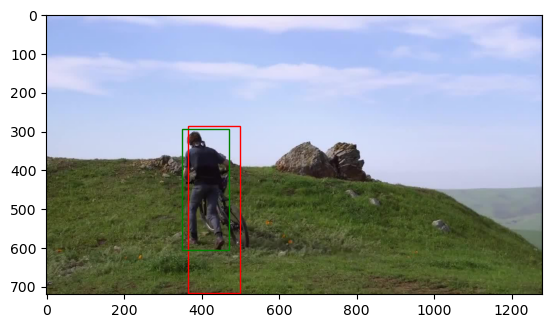

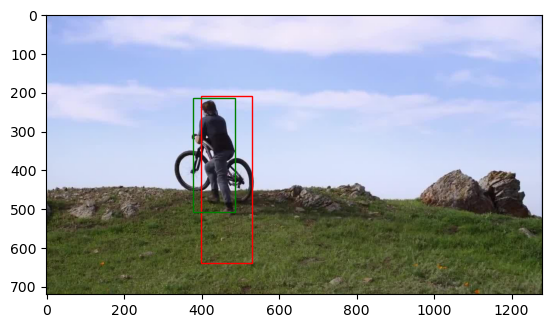

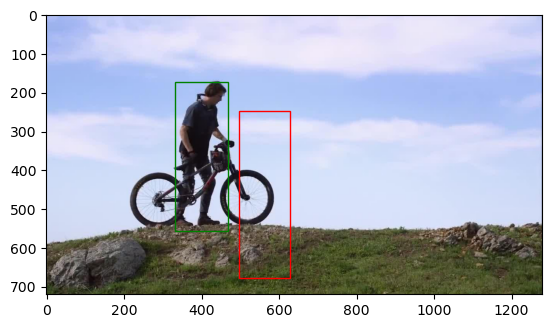

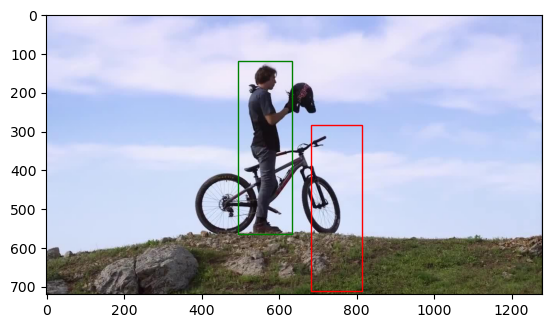

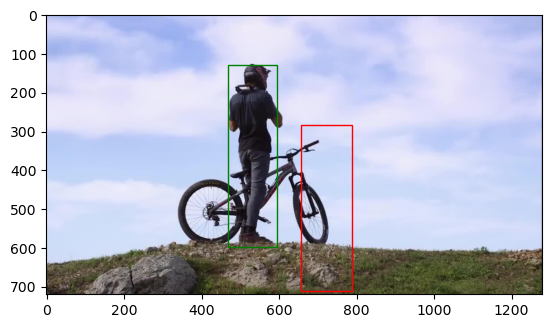

0.21406426093354639

In [66]:
c2 = trackObject(mainDirectory="Bike",trackAlg ="MIL",maxFramesShow=600,showEveryX=100)
sum(c2)/len(c2)

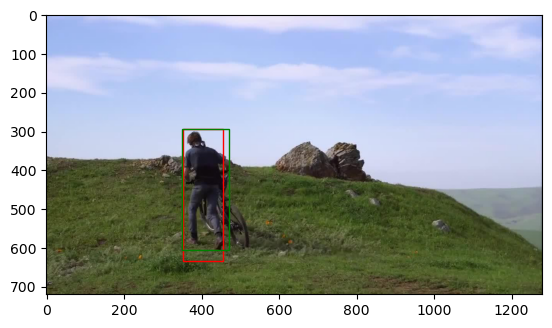

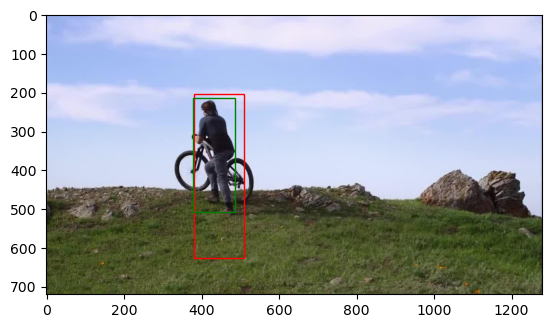

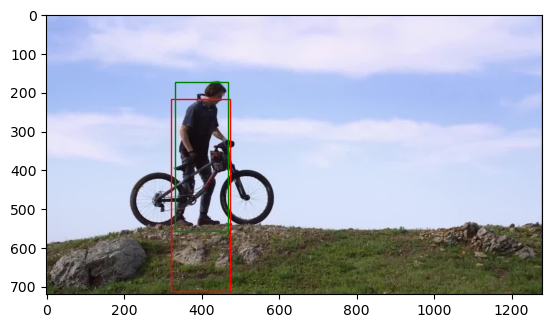

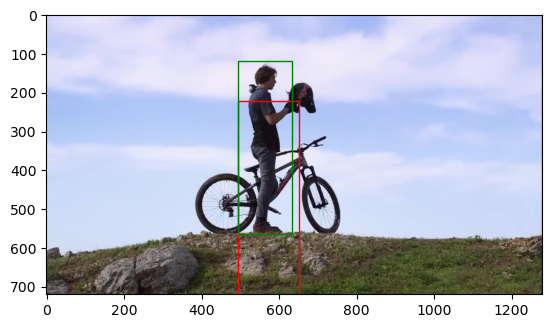

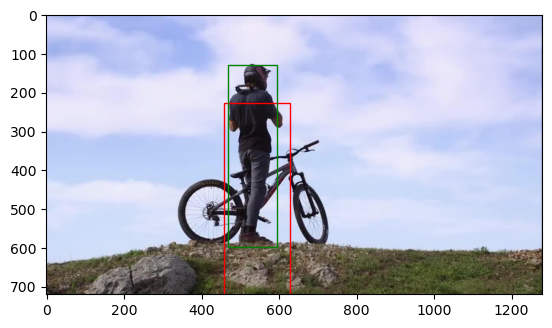

0.5694888050002992

In [67]:
c2 = trackObject(mainDirectory="Bike",trackAlg ="CSRT",maxFramesShow=600,showEveryX=100)
sum(c2)/len(c2)

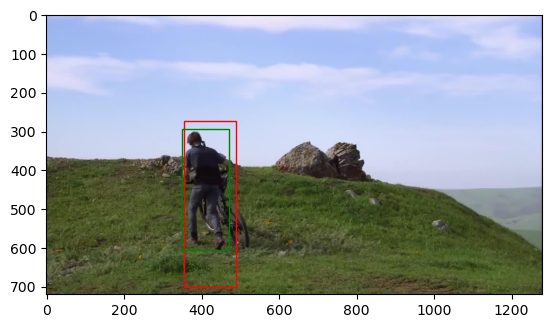

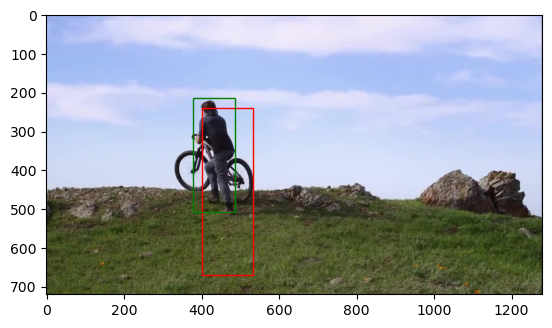

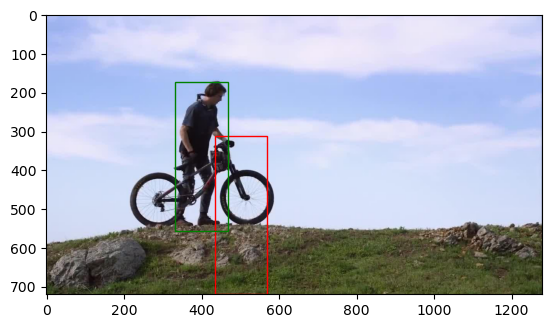

0.3551291527982981

In [68]:
c2 = trackObject(mainDirectory="Bike",trackAlg ="KCF",maxFramesShow=400,showEveryX=100)
sum(c2)/len(c2)